<a href="https://colab.research.google.com/github/bpizarrogalleguillos/IAmetodologia2025/blob/main/Taller_Supervisado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos supervisados


## Objetivo
Entregar una comprensión básica de los modelos supervisados en machine learning y cómo se aplican en contextos clínicos, especialmente en radiología, utilizando ejemplos guiados en Google Colab autoejecutable sin necesidad de conocimientos avanzados de programación.

# Aprendizaje esperado

1. Conocer los tipos de problema donde los modelos supervisados pueden ser aplicados
2. Entender el concepto de variables y como se integran al flujo de trabajo en un proyecto de ML supervisado
3. Identificar modelos de ML supervisados y cómo se evalúa su rendimiento

## Temario

## Tipos de problemas supervisados
* Regresión
* Predicción - Clasificación

## Variables
* Features
* Labels

## Flujo de trabajo en un proyecto
* Recolección de datos
* Pre procesamiento
* División del dataset
* Entrenamiento
* Evaluación

## Modelos
* Regresión Lineal
* Regresión Logística
* SVM
* Random Forest
* Perceptrón y Red Neuronal

## Métricas de desempeño
* Accuracy
* Sensitivity
* Recall
* Curvas AUC/ROC

# Ejemplo en radiología
* Neumonía


# Glosario términos claves

- **Modelo supervisado:** Algoritmo que aprende a partir de datos etiquetados (donde se conoce el resultado).
- **Regresión:** Predice un valor numérico continuo (ej. nivel de PCR).
- **Clasificación:** Predice una categoría (ej. tiene o no tiene neumonía).
- **Features (X):** Variables de entrada o características del paciente (edad, fiebre, PCR, etc.).
- **Label (y):** Variable objetivo que queremos predecir (ej. diagnóstico de neumonía).
- **Overfitting:** El modelo memoriza demasiado los datos de entrenamiento y no generaliza bien.
- **Underfitting:** El modelo no aprende patrones útiles; tiene bajo rendimiento en todos los datos.
- **Train/Test Split:** Dividir los datos para que el modelo se entrene en unos y se evalúe en otros.
- **Validation Set:** Subconjunto de entrenamiento usado para ajustar hiperparámetros.
- **ROC Curve:** Muestra el balance entre sensibilidad y especificidad.
- **AUC (Área bajo la curva):** Mide la capacidad de discriminación del modelo; más alto es mejor.
- **Precision:** De todos los positivos predichos, cuántos eran realmente positivos.
- **Recall (Sensibilidad):** De todos los positivos reales, cuántos fueron correctamente identificados.

# Tipos de problemas supervisados

# Ejemplo en Radiología


Primero debemos instalar las liberías que usaremos. Podemos pensar las librerías como pequeños "programas" que ya fueron programados y que contienen funciones que podemos usar para diferentes tareas específicas.

In [ ]:
# Cuaderno de Google Colab: Introducción a Machine Learning Supervisado en Radiología

#@title 🔍 Introducción
"""
Este cuaderno interactivo tiene como objetivo enseñar los conceptos básicos de Machine Learning supervisado
aplicados a un caso clínico simplificado de radiología.

👩‍⚕️ Caso: Predicción de neumonía en base a datos clínicos y hallazgos imagenológicos.
"""

#@title 📦 Instalación de librerías necesarias (solo si da error en tu entorno)
# Si estás en Google Colab, normalmente ya están instaladas.
!pip install -q pandas scikit-learn matplotlib seaborn

#@title 📁 Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



# 📋 Flujo completo de ML en Radiología: Diagnóstico de Neumonía
"""
🚀 Flujo de trabajo clásico en Machine Learning:

1. Recolección de datos → Dataset clínico simulado.
2. Preprocesamiento     → Codificación de variables categóricas, limpieza.
3. División del dataset  → Train/Test split.
4. Entrenamiento         → Modelos supervisados.
5. Evaluación            → Métricas: accuracy, recall, curva ROC.
"""

In [ ]:
#@title 📊 Crear un dataset clínico simulado
# Simulación de datos clínicos de pacientes
np.random.seed(42)
n = 300

# Simular fiebre primero
fiebre = np.random.choice([0, 1], size=n, p=[0.3, 0.7])

# Leucocitosis más alta si hay fiebre
leucocitosis = np.random.normal(loc=9500 + 3000*fiebre, scale=1500, size=n).astype(int)

# PCR más alta si hay fiebre y leucocitosis alta
pcr = 10 + 0.002 * leucocitosis + 10 * fiebre + np.random.normal(0, 5, size=n)
pcr = np.round(pcr, 1)

# Simular otras variables clínicas y de imagen
sexo = np.random.choice(['M', 'F'], size=n)
tos = np.random.choice([0, 1], size=n, p=[0.4, 0.6])
infiltrado_rx = np.random.choice([0, 1], size=n, p=[0.5, 0.5])
engrosamiento_parietal = np.random.choice([0, 1], size=n, p=[0.7, 0.3])
foco_condensacion = np.random.choice([0, 1], size=n, p=[0.6, 0.4])
patron_intersticial = np.random.choice([0, 1], size=n, p=[0.65, 0.35])
derrame_pleural = np.random.choice([0, 1], size=n, p=[0.8, 0.2])
broncograma_aereo = np.random.choice([0, 1], size=n, p=[0.7, 0.3])
cruza_cisuras = np.random.choice([0, 1], size=n, p=[0.85, 0.15])
edad = np.random.randint(18, 90, size=n)

# Crear el DataFrame
data = pd.DataFrame({
    'edad': edad,
    'sexo': sexo,
    'fiebre': fiebre,
    'tos': tos,
    'infiltrado_rx': infiltrado_rx,
    'engrosamiento_parietal': engrosamiento_parietal,
    'foco_condensacion': foco_condensacion,
    'patron_intersticial': patron_intersticial,
    'derrame_pleural': derrame_pleural,
    'broncograma_aereo': broncograma_aereo,
    'cruza_cisuras': cruza_cisuras,
    'leucocitosis': leucocitosis,
    'pcr': pcr
})

# Diagnóstico de neumonía más influenciado por fiebre, leucocitosis, pcr, condensación, tos y broncograma
# Diagnóstico de neumonía con mayor peso para foco de condensación
prob_neumonia = (
    0.05 +
    0.2 * data['fiebre'] +
    0.2 * (data['leucocitosis'] > 12000).astype(int) +
    0.2 * (data['pcr'] > 30).astype(int) +
    0.25 * data['foco_condensacion'] +  # antes 0.15
    0.15 * data['tos'] +
    0.15 * data['broncograma_aereo']
)
prob_neumonia = np.clip(prob_neumonia, 0, 0.95)
data['diagnostico_neumonia'] = np.random.binomial(1, prob_neumonia)

# Ingreso a UCI
prob_uci = (
    0.05 +
    0.3 * data['diagnostico_neumonia'] +
    0.2 * (data['edad'] > 70).astype(int) +
    0.2 * (data['pcr'] > 40).astype(int) +
    0.2 * data['derrame_pleural'] +
    0.1 * (data['leucocitosis'] > 14000).astype(int)
)
prob_uci = np.clip(prob_uci, 0, 0.9)
data['ingreso_uci'] = np.random.binomial(1, prob_uci)

# Intubación
prob_intubacion = (
    0.03 +
    0.4 * data['ingreso_uci'] +
    0.2 * data['diagnostico_neumonia'] +
    0.2 * data['broncograma_aereo'] +
    0.1 * (data['edad'] > 75).astype(int)
)
prob_intubacion = np.clip(prob_intubacion, 0, 0.8)
data['intubacion'] = np.random.binomial(1, prob_intubacion)

# Mortalidad
prob_mortalidad = (
    0.02 +
    0.3 * data['intubacion'] +
    0.2 * data['ingreso_uci'] +
    0.2 * (data['edad'] > 80).astype(int) +
    0.2 * (data['pcr'] > 50).astype(int)
)
prob_mortalidad = np.clip(prob_mortalidad, 0, 0.6)
data['mortalidad'] = np.random.binomial(1, prob_mortalidad)

# Mostrar primeras filas
data.head()


,edad,sexo,fiebre,tos,infiltrado_rx,engrosamiento_parietal,foco_condensacion,patron_intersticial,derrame_pleural,broncograma_aereo,cruza_cisuras,leucocitosis,pcr,diagnostico_neumonia,ingreso_uci,intubacion,mortalidad
0,58,F,1,1,0,0,1,0,1,0,0,12568,44.8,1,0,0,0
1,48,F,1,0,1,0,0,0,0,0,0,11522,37.0,1,1,1,0
2,39,F,1,1,0,0,1,1,0,0,0,15715,48.2,1,0,0,0
3,21,M,1,1,0,1,0,0,0,0,0,13450,47.1,1,1,1,0
4,30,M,0,1,0,0,1,0,0,0,0,6462,18.6,1,0,1,1


# Análisis exploratorio

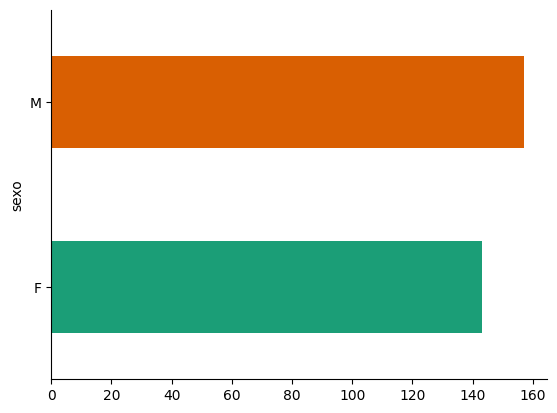

In [ ]:
# @title sexo

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

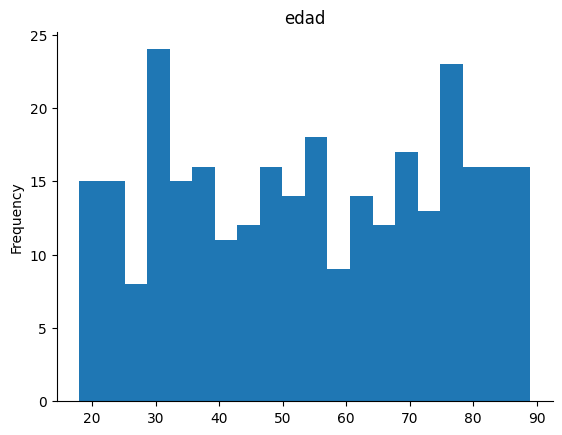

In [ ]:
# @title edad

from matplotlib import pyplot as plt
data['edad'].plot(kind='hist', bins=20, title='edad')
plt.gca().spines[['top', 'right',]].set_visible(False)

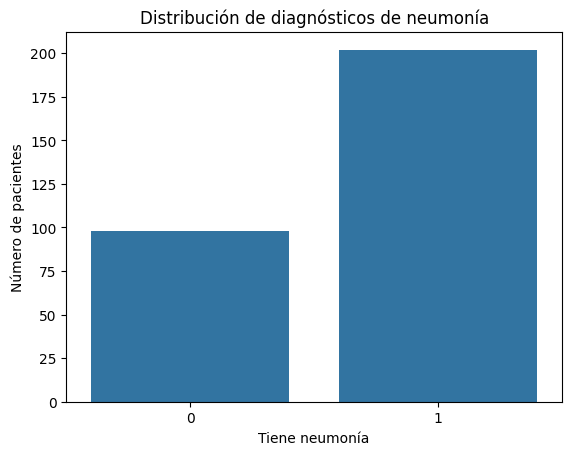

In [ ]:
#@title 📈 Visualización básica del dataset
sns.countplot(x='diagnostico_neumonia', data=data)
plt.title("Distribución de diagnósticos de neumonía")
plt.xlabel("Tiene neumonía")
plt.ylabel("Número de pacientes")
plt.show()

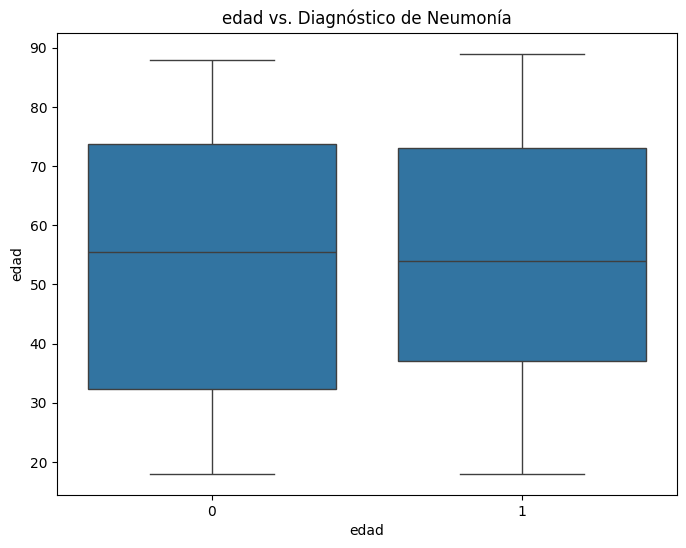

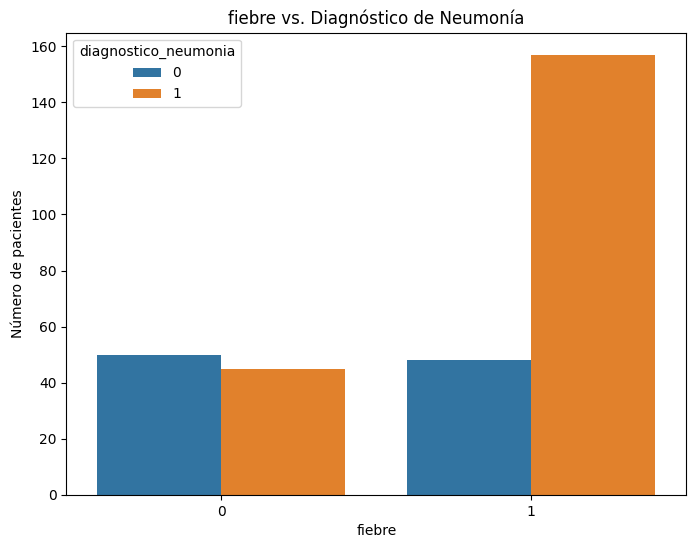

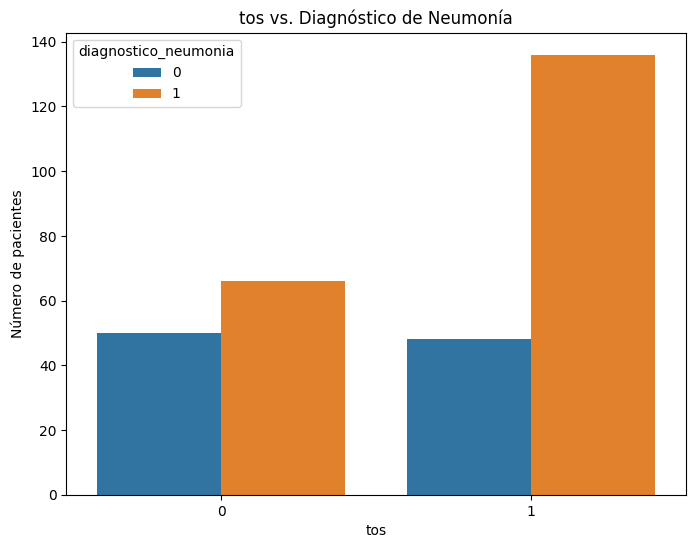

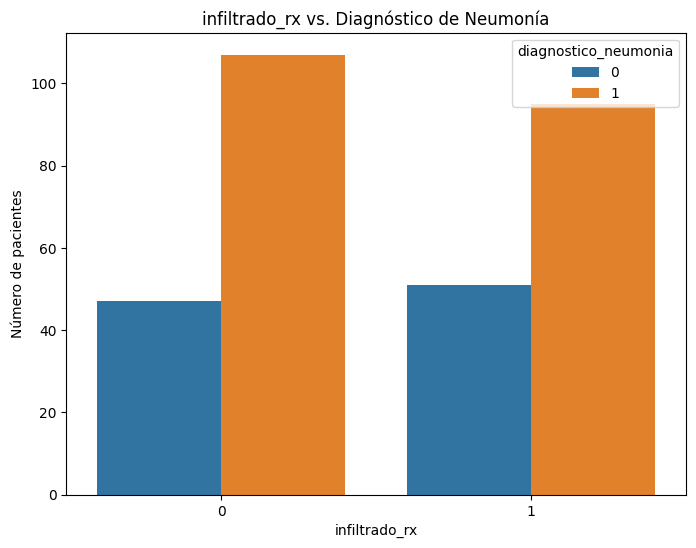

In [ ]:
# Lista de variables a comparar con el diagnóstico de neumonía
features_to_plot = ['edad', 'fiebre', 'tos', 'infiltrado_rx']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))

    if data[feature].nunique() <= 2:  # Variables binarias o categóricas simples
        sns.countplot(x=feature, hue='diagnostico_neumonia', data=data)
        plt.ylabel('Número de pacientes')
    else:  # Variables continuas (como edad)
        sns.boxplot(x='diagnostico_neumonia', y=feature, data=data)
        plt.ylabel(feature)

    plt.title(f'{feature} vs. Diagnóstico de Neumonía')
    plt.xlabel(feature)
    plt.show()

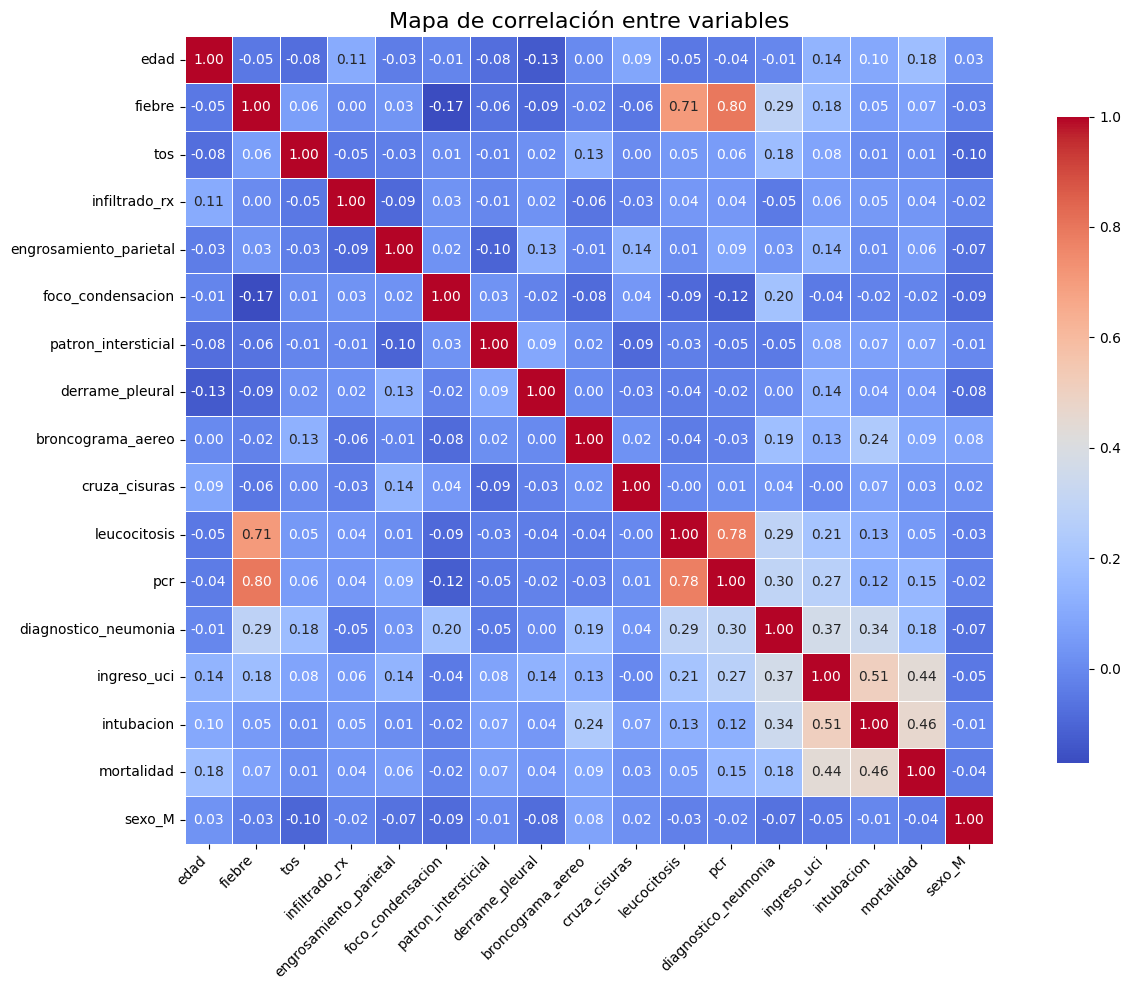

In [ ]:
#@title 📊 Mapa de correlación entre variables

# Asegurar que todas las variables categóricas estén codificadas numéricamente
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Calcular matriz de correlación
correlation_matrix = encoded_data.corr()

# Graficar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Mapa de correlación entre variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#@title 🔄 Preprocesamiento de datos

# Convertir variable categórica 'sexo' a variable numérica
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Eliminar variables que no deben ser usadas como predictoras del diagnóstico
variables_a_excluir = ['ingreso_uci', 'intubacion', 'mortalidad']
X = encoded_data.drop(columns=['diagnostico_neumonia'] + variables_a_excluir)

# Variable objetivo
y = encoded_data['diagnostico_neumonia']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X

,edad,fiebre,tos,infiltrado_rx,engrosamiento_parietal,foco_condensacion,patron_intersticial,derrame_pleural,broncograma_aereo,cruza_cisuras,leucocitosis,pcr,sexo_M
0,58,1,1,0,0,1,0,1,0,0,12568,44.8,False
1,48,1,0,1,0,0,0,0,0,0,11522,37.0,False
2,39,1,1,0,0,1,1,0,0,0,15715,48.2,False
3,21,1,1,0,1,0,0,0,0,0,13450,47.1,True
4,30,0,1,0,0,1,0,0,0,0,6462,18.6,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,47,1,0,1,0,1,0,0,0,0,12572,42.5,False
296,35,1,1,0,0,0,0,0,0,0,12889,43.7,False
297,86,0,1,1,0,0,1,0,0,0,8143,24.9,True
298,56,1,0,1,0,0,1,0,1,0,13457,40.2,True


# Ejemplo de regresión linea

Ya hemos realizado un análisis exploratorio de los datos. Ahora queremos modelar y poder cuantificar la relación entre ellos. Para esto contamos con una herramienta simple pero de gran utilidad denominada regresión lineal.

En base a lo expuesto en la clase ¿Que variables podrían ser utilizadas para una regresión lineal en este set de datos?

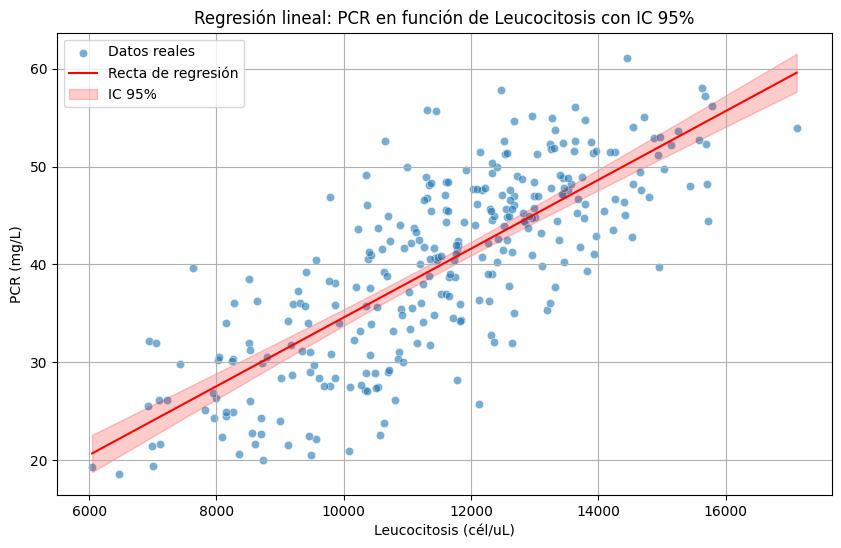

In [ ]:
#@title 📈 Regresión lineal con intervalo de confianza del 95%
import statsmodels.api as sm

# Variable independiente y dependiente
X_lin = data[['leucocitosis']]
y_lin = data['pcr']

# Agregar constante para statsmodels
X_lin_const = sm.add_constant(X_lin)

# Ajustar modelo con statsmodels para obtener IC
modelo_lin = sm.OLS(y_lin, X_lin_const).fit()

# Generar valores para predecir y graficar
x_pred = np.linspace(X_lin['leucocitosis'].min(), X_lin['leucocitosis'].max(), 300)
x_pred_df = pd.DataFrame({'leucocitosis': x_pred})
x_pred_const = sm.add_constant(x_pred_df)

# Predicciones con IC
preds = modelo_lin.get_prediction(x_pred_const)
pred_summary = preds.summary_frame(alpha=0.05)  # 95% CI

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='leucocitosis', y='pcr', data=data, label='Datos reales', alpha=0.6)
plt.plot(x_pred, pred_summary['mean'], color='red', label='Recta de regresión')
plt.fill_between(x_pred, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='red', alpha=0.2, label='IC 95%')
plt.xlabel('Leucocitosis (cél/uL)')
plt.ylabel('PCR (mg/L)')
plt.title('Regresión lineal: PCR en función de Leucocitosis con IC 95%')
plt.legend()
plt.grid(True)
plt.show()

# Regresión Logística

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


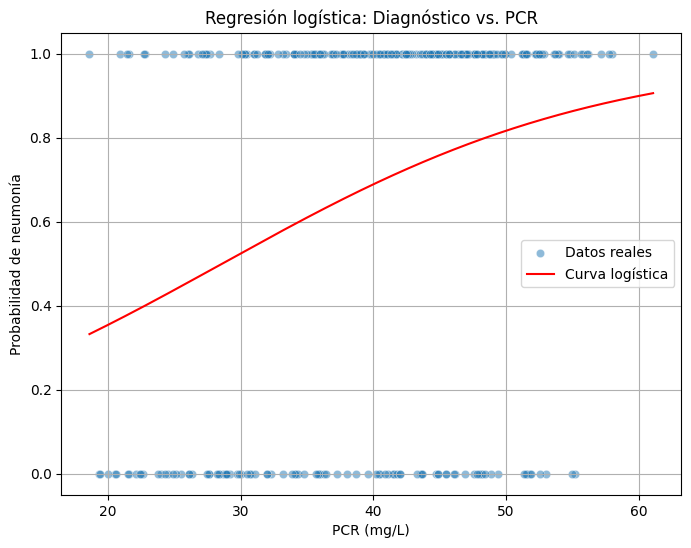

In [ ]:
#@title 📉 Ejemplo de regresión logística: Neumonía vs. PCR
from sklearn.linear_model import LogisticRegression

# Variables
X_log = data[['pcr']]
y_log = data['diagnostico_neumonia']

# Modelo
modelo_log = LogisticRegression()
modelo_log.fit(X_log, y_log)

# Predicciones (probabilidad)
x_range = np.linspace(data['pcr'].min(), data['pcr'].max(), 300).reshape(-1, 1)
y_pred_prob = modelo_log.predict_proba(x_range)[:, 1]

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pcr', y='diagnostico_neumonia', data=data, label='Datos reales', alpha=0.5)
plt.plot(x_range, y_pred_prob, color='red', label='Curva logística')
plt.xlabel('PCR (mg/L)')
plt.ylabel('Probabilidad de neumonía')
plt.title('Regresión logística: Diagnóstico vs. PCR')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title 🤖 Entrenar modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Ejemplo de regresión linea#@title 📊 Evaluación del modelo
predicciones = modelo.predict(X_test)
print("Exactitud del modelo (accuracy):", accuracy_score(y_test, predicciones))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, predicciones))



Exactitud del modelo (accuracy): 0.6666666666666666

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.46      0.43      0.44        28
           1       0.75      0.77      0.76        62

    accuracy                           0.67        90
   macro avg       0.61      0.60      0.60        90
weighted avg       0.66      0.67      0.66        90



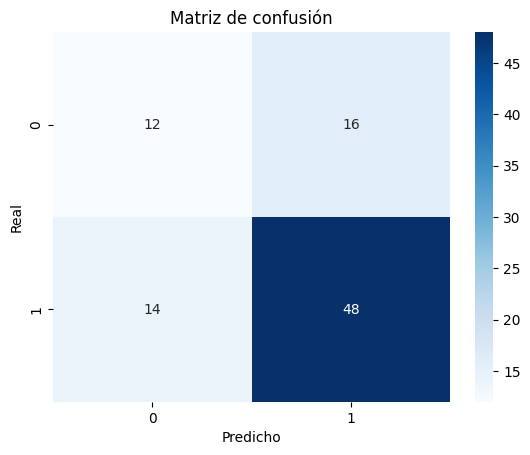

In [ ]:
# Matriz de confusión
def plot_confusion(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title('Matriz de confusión')
    plt.show()

cm = confusion_matrix(y_test, predicciones)
plot_confusion(cm)


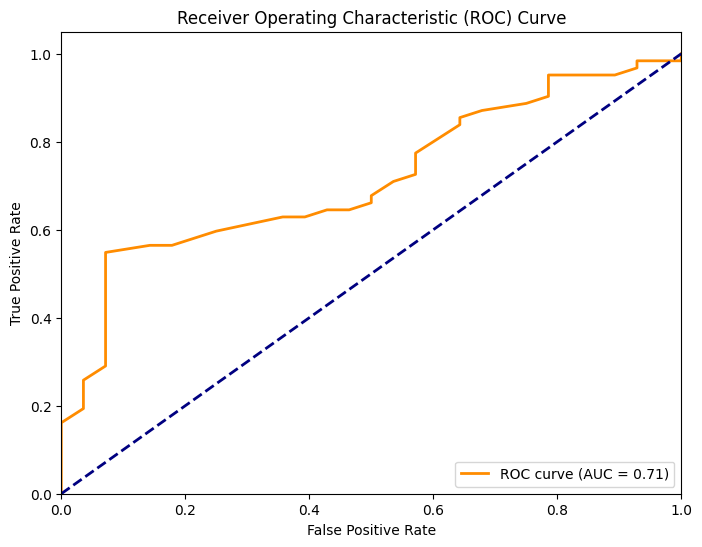

In [ ]:
# prompt: Create AUC/ROC curves for this random forest trained model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = modelo.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#@title 🔍 Simulador de predicción de neumonía

#@markdown Ingresa las características del paciente:
edad = 56  #@param {type: "slider", min: 18, max: 100, step: 1}
sexo = "F"  #@param ["M", "F"]
fiebre = 0  #@param {type:"slider", min:0, max:1, step:1}
tos = 1  #@param {type:"slider", min:0, max:1, step:1}
infiltrado_rx = 0  #@param {type:"slider", min:0, max:1, step:1}
engrosamiento_parietal = 0  #@param {type:"slider", min:0, max:1, step:1}
foco_condensacion = 0  #@param {type:"slider", min:0, max:1, step:1}
patron_intersticial = 1  #@param {type:"slider", min:0, max:1, step:1}
derrame_pleural = 1  #@param {type:"slider", min:0, max:1, step:1}
broncograma_aereo = 1  #@param {type:"slider", min:0, max:1, step:1}
cruza_cisuras = 0  #@param {type:"slider", min:0, max:1, step:1}
leucocitosis = 12000  #@param {type:"slider", min:4000, max:20000, step:500}
pcr = 17  #@param {type:"slider", min:0, max:100, step:1}

# Crear diccionario base con todas las columnas en 0
nuevo_paciente_dict = {col: 0 for col in X.columns}

# Actualizar valores conocidos
nuevo_paciente_dict.update({
    'edad': edad,
    'sexo_M': 1 if sexo == 'M' else 0,
    'fiebre': fiebre,
    'tos': tos,
    'infiltrado_rx': infiltrado_rx,
    'engrosamiento_parietal': engrosamiento_parietal,
    'foco_condensacion': foco_condensacion,
    'patron_intersticial': patron_intersticial,
    'derrame_pleural': derrame_pleural,
    'broncograma_aereo': broncograma_aereo,
    'cruza_cisuras': cruza_cisuras,
    'leucocitosis': leucocitosis,
    'pcr': pcr
})

# Crear DataFrame asegurando el orden
nuevo_paciente = pd.DataFrame([nuevo_paciente_dict], columns=X.columns)

# Predicción
pred_nuevo = modelo.predict(nuevo_paciente)
proba = modelo.predict_proba(nuevo_paciente)[0][1]

print("¿Tiene neumonía este paciente?")
print(f"Predicción: {pred_nuevo}")
print(f"Probabilidad estimada: {proba:.2%}")

¿Tiene neumonía este paciente?
Predicción: [1]
Probabilidad estimada: 57.00%


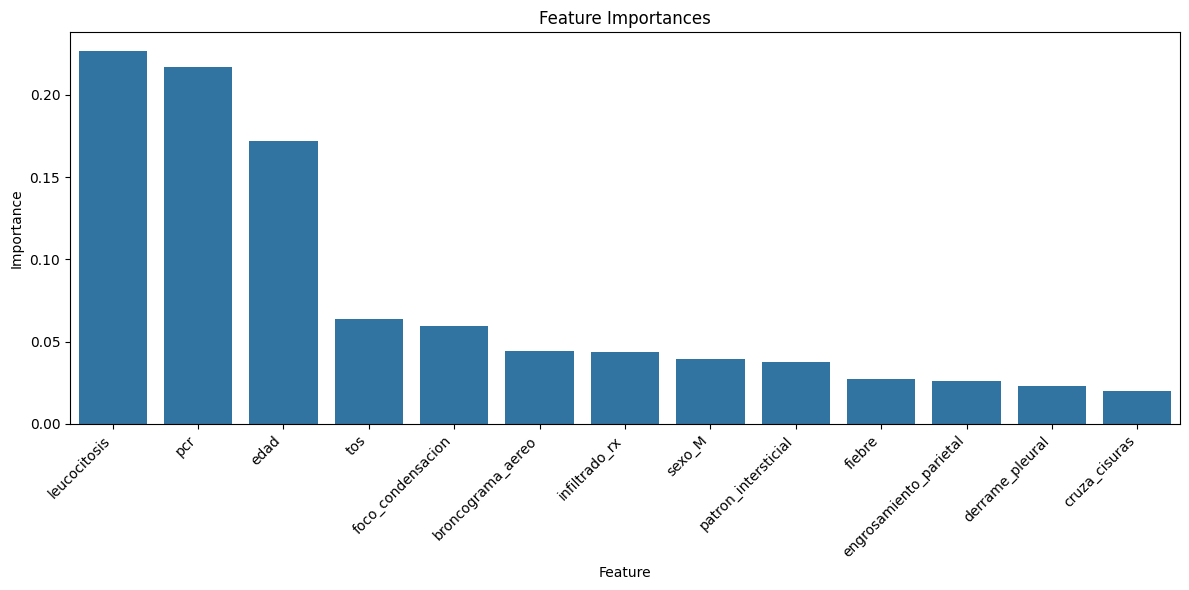

In [ ]:
#@title Explicabilidad
importances = modelo.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()



🔍 Modelo: Logística
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.77      0.85      0.81        62

    accuracy                           0.72        90
   macro avg       0.67      0.64      0.65        90
weighted avg       0.71      0.72      0.71        90

AUC: 0.80


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


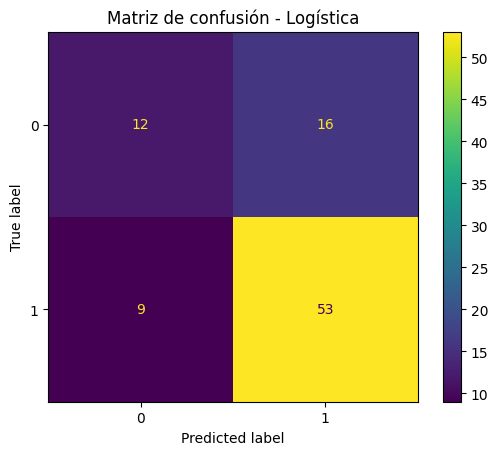


🔍 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        28
           1       0.75      0.81      0.78        62

    accuracy                           0.68        90
   macro avg       0.61      0.60      0.60        90
weighted avg       0.66      0.68      0.67        90

AUC: 0.71


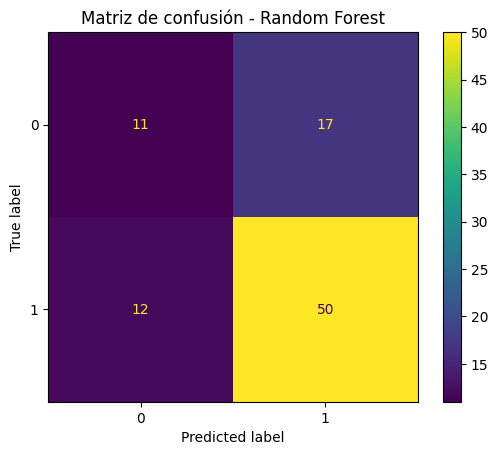


🔍 Modelo: SVM
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        28
           1       0.76      0.90      0.82        62

    accuracy                           0.73        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.73      0.71        90

AUC: 0.76


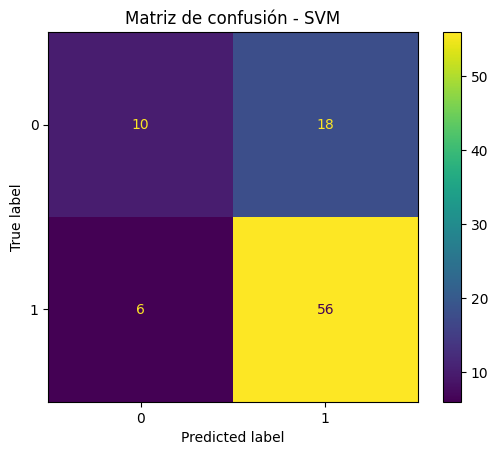


🔍 Modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.31      1.00      0.47        28
           1       0.00      0.00      0.00        62

    accuracy                           0.31        90
   macro avg       0.16      0.50      0.24        90
weighted avg       0.10      0.31      0.15        90

AUC: 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


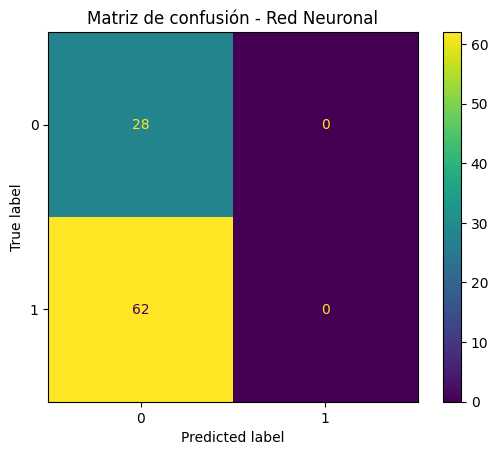

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


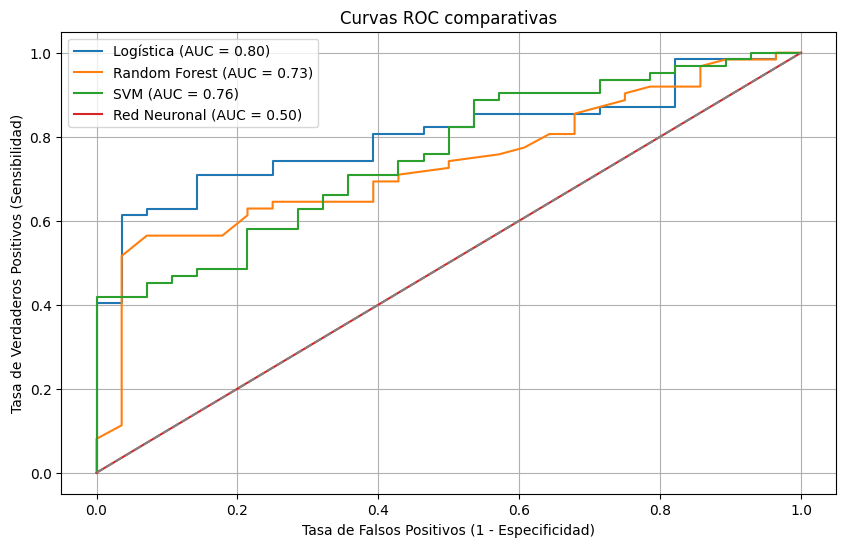

In [ ]:
#@title 🤖 Modelos adicionales: SVM y Red Neuronal simple
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# SVM lineal
modelo_svm = SVC(kernel='linear', probability=True)
modelo_svm.fit(X_train, y_train)

# Red neuronal simple
modelo_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
modelo_nn.fit(X_train, y_train)

#@title 📊 Comparación de modelos y métricas
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay

modelos = {
    'Logística': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', probability=True),
    'Red Neuronal': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    print(f"\n🔍 Modelo: {nombre}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


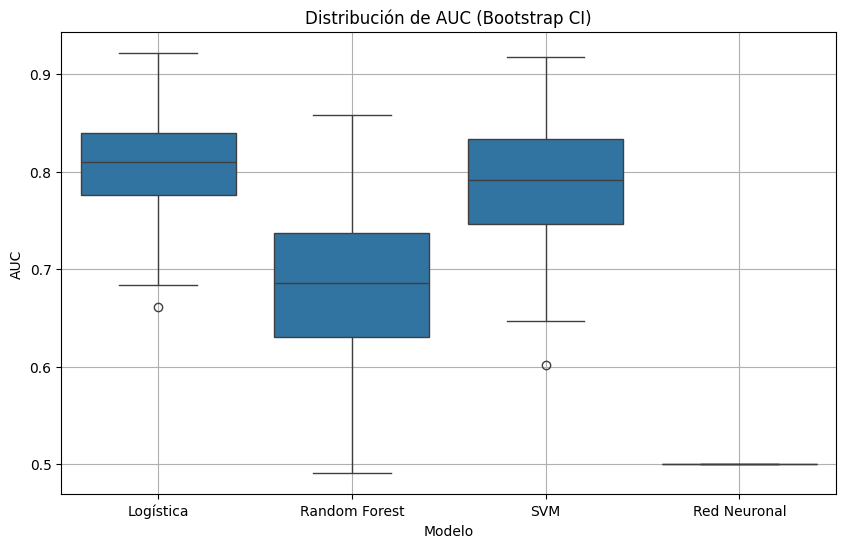

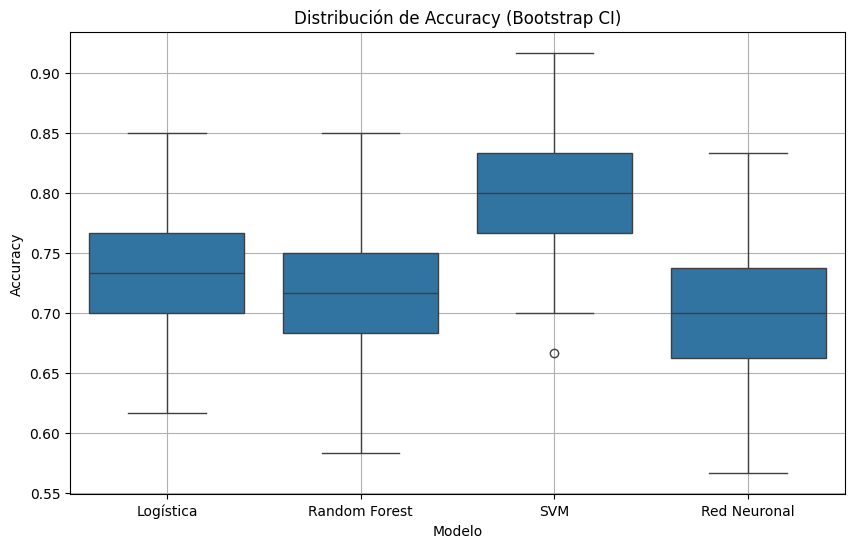

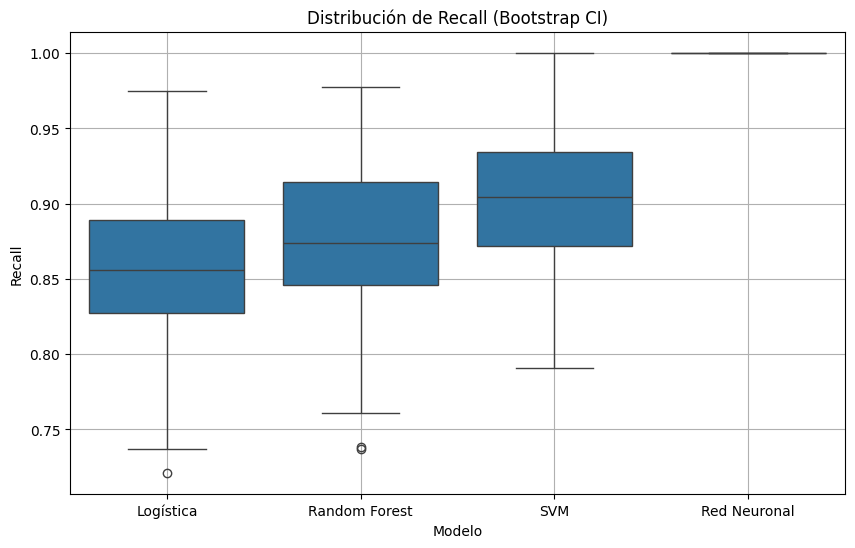

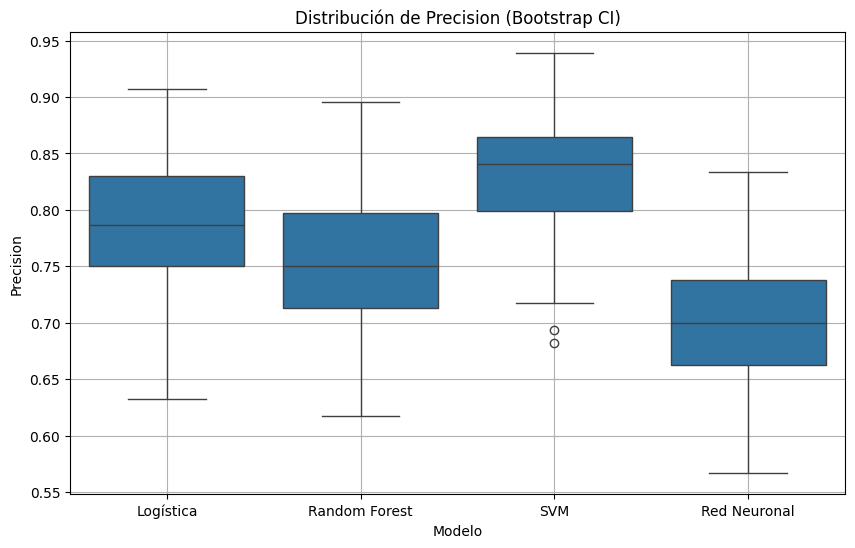

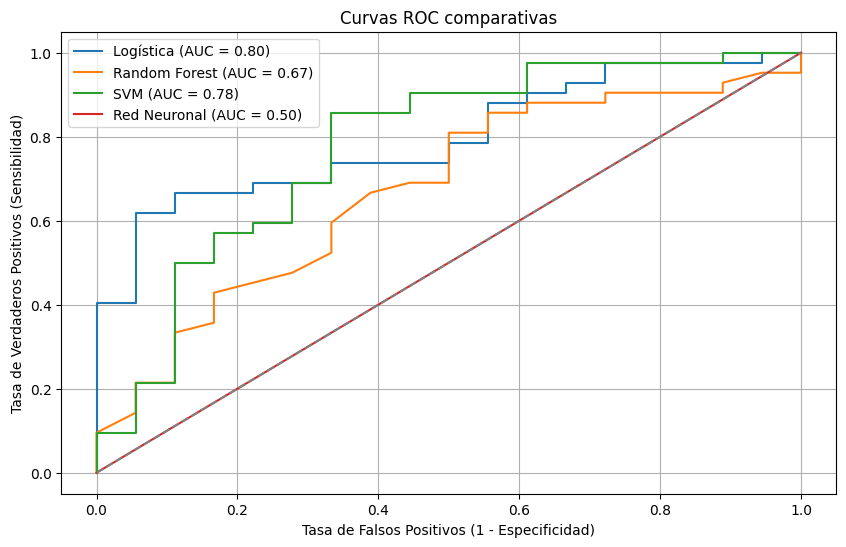

In [ ]:
#@title 📊 Comparación de modelos con Bootstrap y boxplots
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
import seaborn as sns


for modelo in modelos.values():
    modelo.fit(X_train, y_train)

# Bootstrap sobre test set
n_bootstraps = 100
metricas_boot = []
np.random.seed(42)

for i in range(n_bootstraps):
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    X_bs = X_test.iloc[indices]
    y_bs = y_test.iloc[indices]
    for nombre, modelo in modelos.items():
        y_pred = modelo.predict(X_bs)
        y_proba = modelo.predict_proba(X_bs)[:, 1]
        metricas_boot.append({
            'Modelo': nombre,
            'AUC': roc_auc_score(y_bs, y_proba),
            'Accuracy': accuracy_score(y_bs, y_pred),
            'Recall': recall_score(y_bs, y_pred),
            'Precision': precision_score(y_bs, y_pred)
        })

df_metricas = pd.DataFrame(metricas_boot)

# Gráfico boxplot de cada métrica
metricas_a_graficar = ['AUC', 'Accuracy', 'Recall', 'Precision']
for metrica in metricas_a_graficar:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_metricas, x='Modelo', y=metrica)
    plt.title(f"Distribución de {metrica} (Bootstrap CI)")
    plt.grid(True)
    plt.show()

#@title 📈 Curvas ROC comparativas
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
for nombre, modelo in modelos.items():
    y_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC comparativas')
plt.legend()
plt.grid(True)
plt.show()


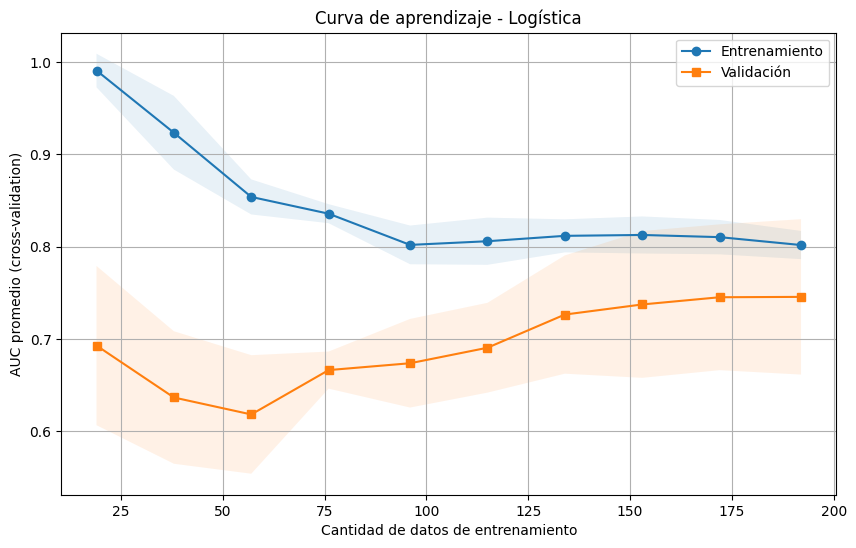

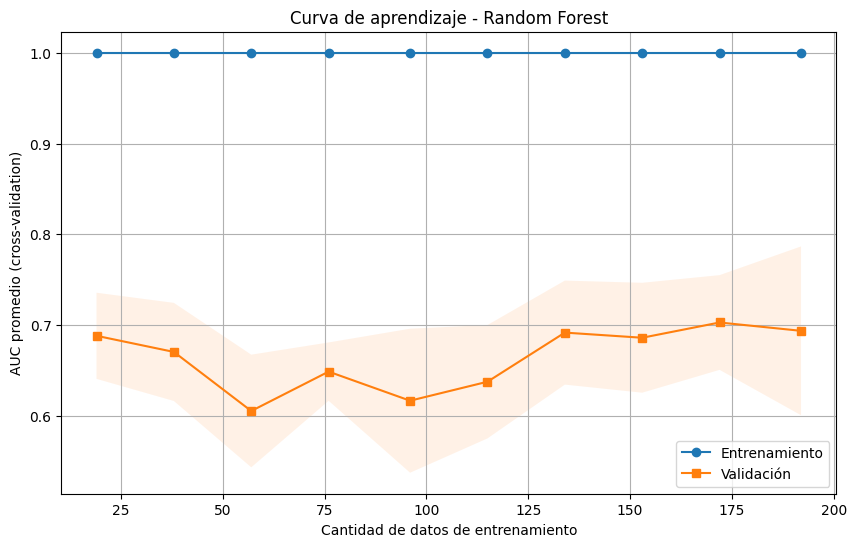

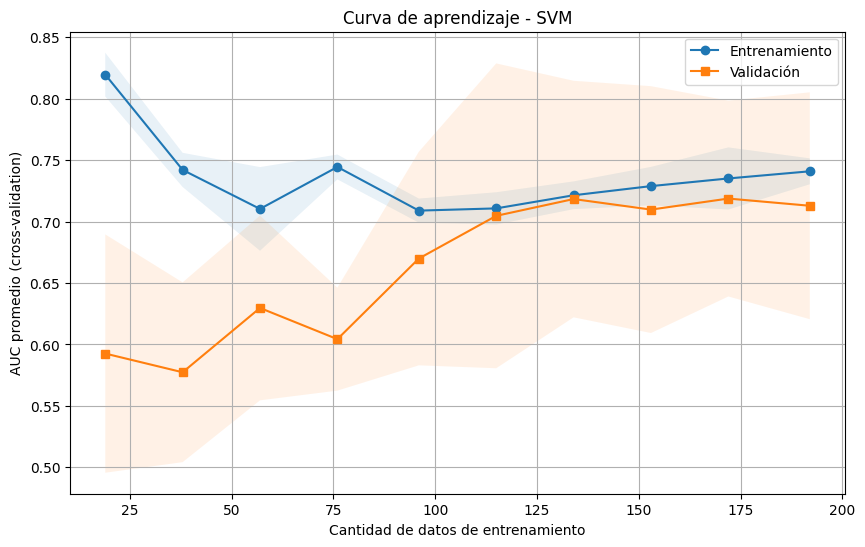

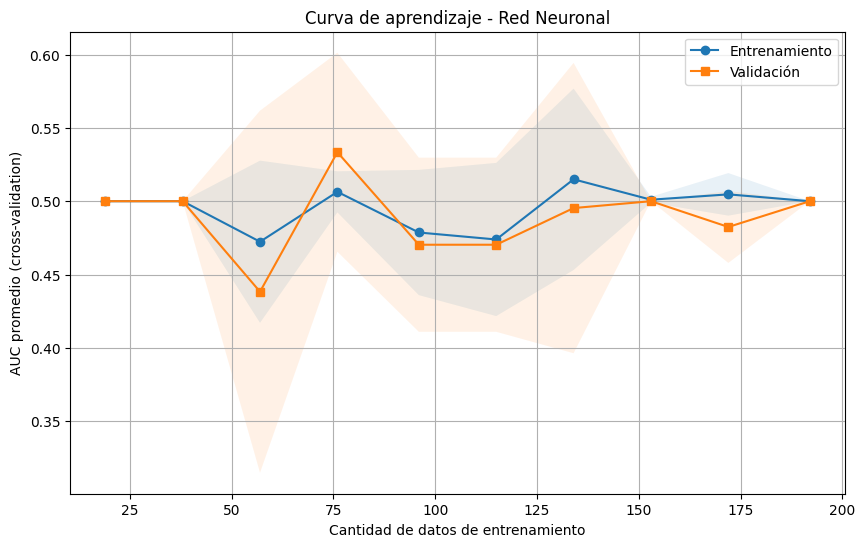

In [ ]:
#@title 📉 Curvas de underfitting vs overfitting por modelo
from sklearn.model_selection import learning_curve


train_sizes = np.linspace(0.1, 1.0, 10)

for nombre, modelo in modelos.items():
    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator=modelo,
        X=X_trainval,
        y=y_trainval,
        train_sizes=train_sizes,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_std = val_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_mean, label='Entrenamiento', marker='o')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1)

    plt.plot(train_sizes_abs, val_mean, label='Validación', marker='s')
    plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1)

    plt.title(f'Curva de aprendizaje - {nombre}')
    plt.xlabel('Cantidad de datos de entrenamiento')
    plt.ylabel('AUC promedio (cross-validation)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Optimización del modelo

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

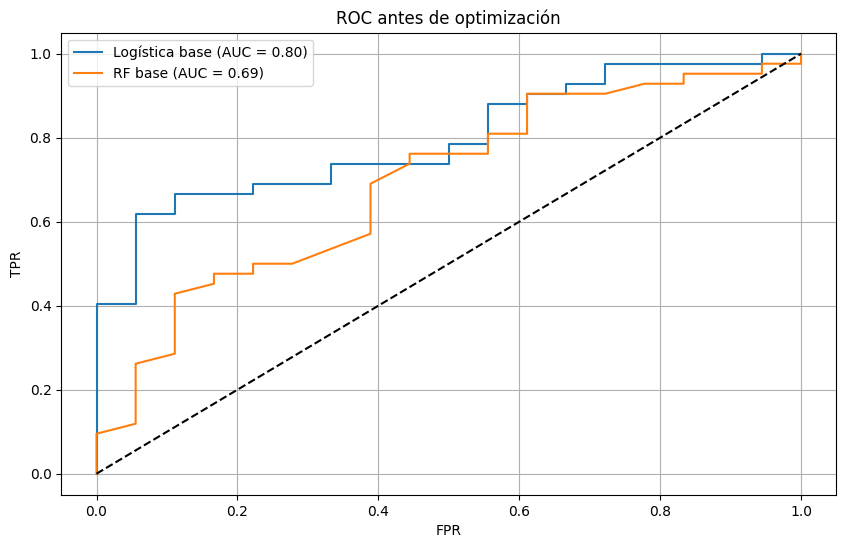

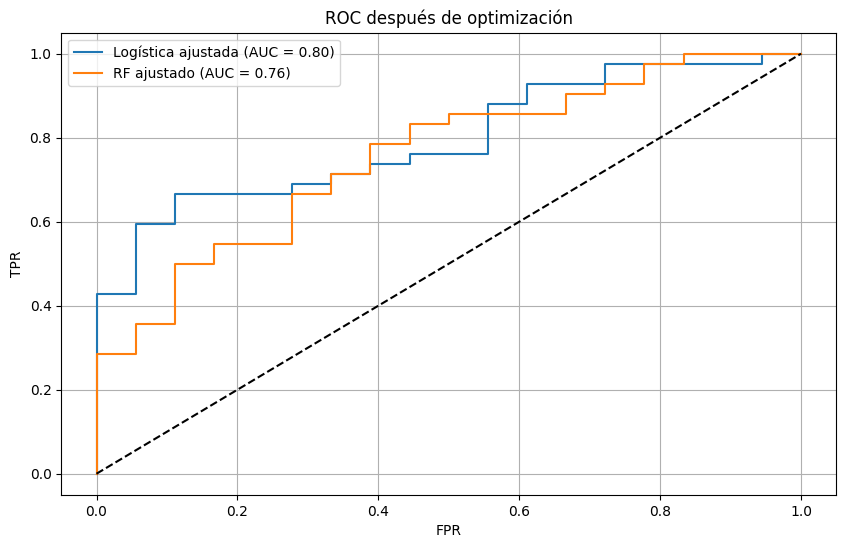

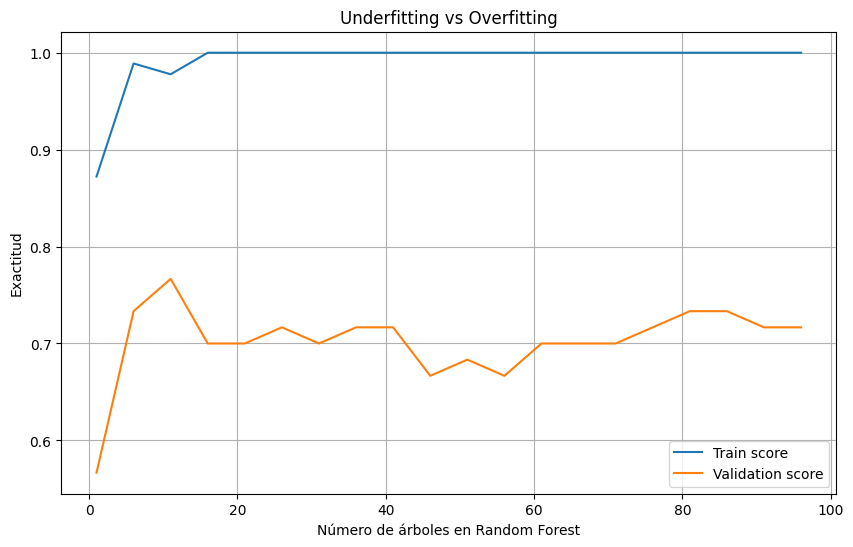

In [ ]:
#@title 📈 Optimización de hiperparámetros y comparación de modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Codificar y dividir datos
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)
X_full = encoded_data.drop(columns=['diagnostico_neumonia', 'ingreso_uci', 'intubacion', 'mortalidad'], errors='ignore')
y_full = encoded_data['diagnostico_neumonia']

# Train, validation, test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Modelos base (sin ajustar)
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Optimización de hiperparámetros
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5, 10]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

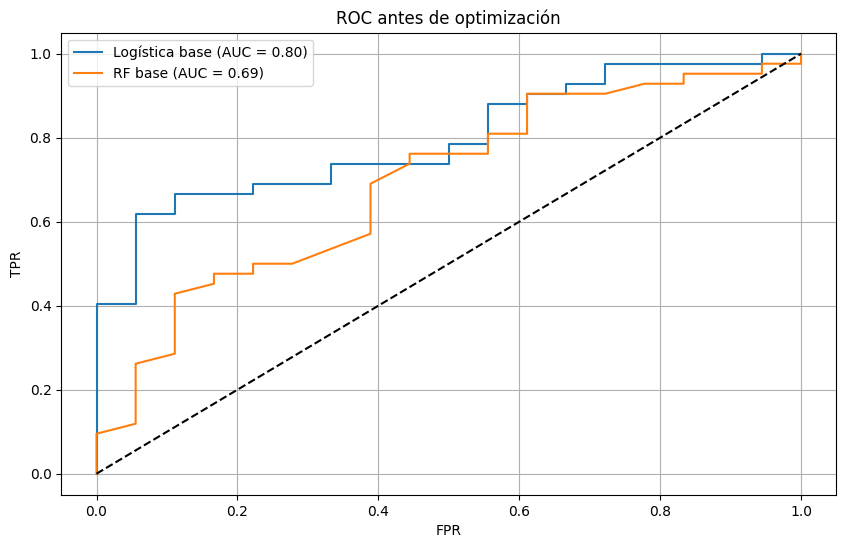

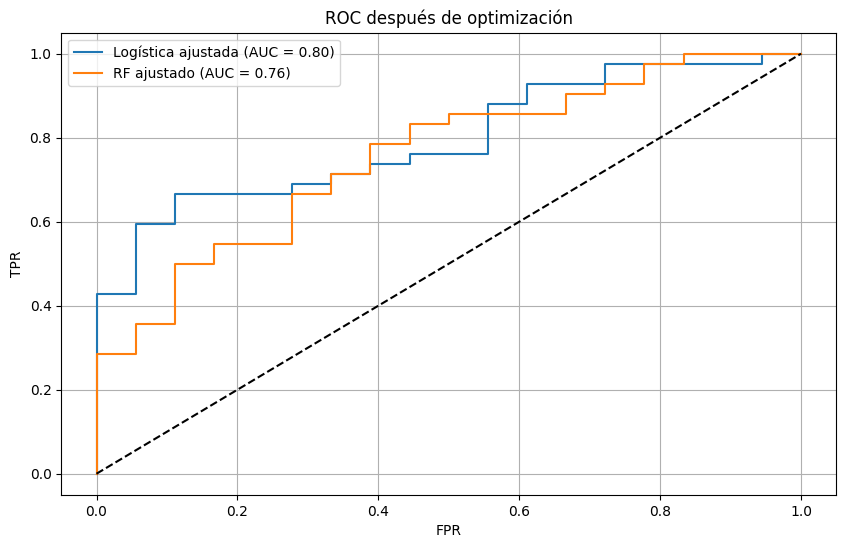

In [ ]:

# Evaluación en test set
def plot_roc_comparison(modelos, X, y, title):
    plt.figure(figsize=(10, 6))
    for nombre, modelo in modelos.items():
        proba = modelo.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Comparación pre y post optimización
modelos_pre = {'Logística base': model_lr, 'RF base': model_rf}
modelos_post = {'Logística ajustada': best_lr, 'RF ajustado': best_rf}

plot_roc_comparison(modelos_pre, X_test, y_test, 'ROC antes de optimización')
plot_roc_comparison(modelos_post, X_test, y_test, 'ROC después de optimización')



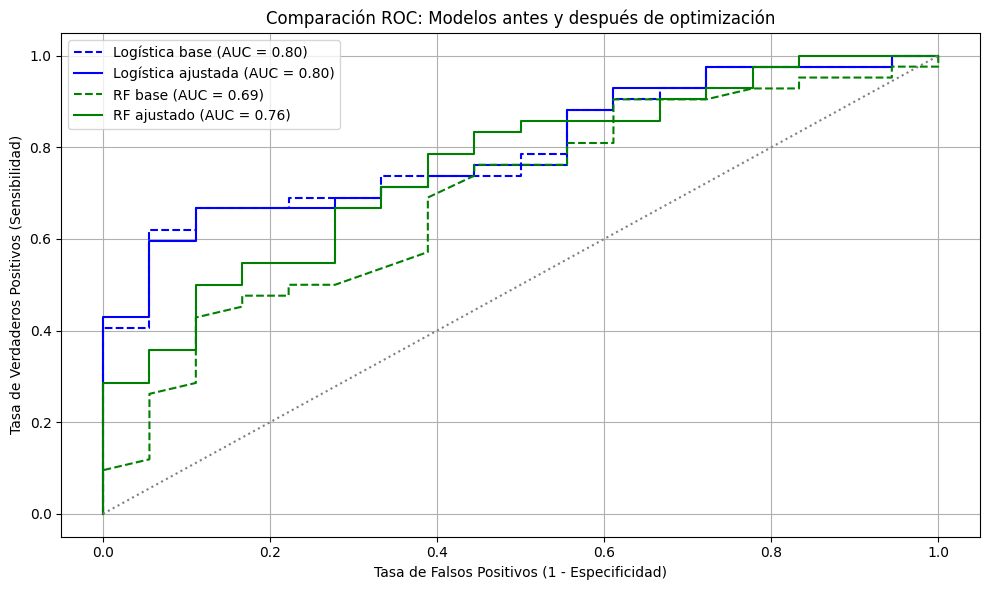

In [ ]:
#@title 📈 Comparación ROC: modelos base vs ajustados
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# ROC para Logística base y ajustada
for modelo, estilo in zip(['Logística base', 'Logística ajustada'], ['--', '-']):
    modelo_actual = modelos_pre[modelo] if 'base' in modelo else modelos_post[modelo]
    proba = modelo_actual.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle=estilo, color='blue', label=f"{modelo} (AUC = {roc_auc:.2f})")

# ROC para Random Forest base y ajustado
for modelo, estilo in zip(['RF base', 'RF ajustado'], ['--', '-']):
    modelo_actual = modelos_pre[modelo] if 'base' in modelo else modelos_post[modelo]
    proba = modelo_actual.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle=estilo, color='green', label=f"{modelo} (AUC = {roc_auc:.2f})")

# Diagonal de referencia
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')

# Personalización
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Comparación ROC: Modelos antes y después de optimización')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Selección de variables

Top 5 variables más importantes: ['leucocitosis', 'pcr', 'edad', 'broncograma_aereo', 'foco_condensacion']


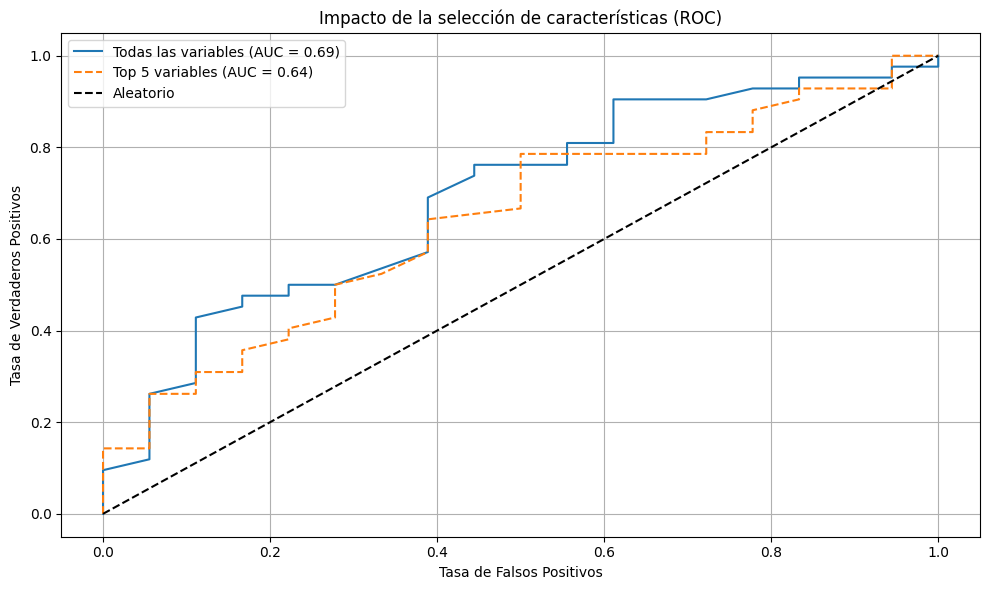

In [ ]:
#@title 📊 Comparación: modelo con todas las variables vs selección de características
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento con todas las variables
modelo_completo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_completo.fit(X_train, y_train)
y_proba_completo = modelo_completo.predict_proba(X_test)[:, 1]
auc_completo = roc_auc_score(y_test, y_proba_completo)

# Obtener las 5 variables más importantes
importances = modelo_completo.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:5]]
print("Top 5 variables más importantes:", list(top_features))

# Entrenamiento solo con las top 5
modelo_reducido = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_reducido.fit(X_train[top_features], y_train)
y_proba_reducido = modelo_reducido.predict_proba(X_test[top_features])[:, 1]
auc_reducido = roc_auc_score(y_test, y_proba_reducido)

# Gráfico comparativo ROC
fpr_full, tpr_full, _ = roc_curve(y_test, y_proba_completo)
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, y_proba_reducido)

plt.figure(figsize=(10, 6))
plt.plot(fpr_full, tpr_full, label=f"Todas las variables (AUC = {auc_completo:.2f})", linestyle='-')
plt.plot(fpr_reduced, tpr_reduced, label=f"Top 5 variables (AUC = {auc_reducido:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Impacto de la selección de características (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#✅ Conclusión

Hemos construido un modelo de aprendizaje supervisado que permite predecir el diagnóstico de neumonía
basado en variables clínicas e imagenológicas simples.

📌 Este ejemplo simplificado permite entender cómo funcionan los modelos sin necesidad de conocimientos avanzados.
👩‍⚕️ En la práctica clínica, se usarían imágenes reales, redes neuronales y validación más robusta.


# Discusión

¿Cómo puede un modelo de ML supervisado mejorar el trabajo del radiólogo?

# Bibliografía